In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
import itertools

from BoltzmannValueIteration import BoltzmannValueIteration
from SetupDeterministicTransition import *
from SetupRewardTable import *

## Visualization Code

In [2]:
def visualizeValueTable(gridWidth, gridHeight, goalState, trapStates, valueTable):
    gridAdjust = .5
    gridScale = 1.5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))
    
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), val in valueTable.items():
        plt.text(statex-.2, statey, str(round(val, 3)))    

    plt.show()


def visualizePolicy(gridWidth, gridHeight, goalState, trapStates, policy):
    #grid height/width
    gridAdjust = .5
    gridScale = 1.5
    arrowScale = .5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), actionDict in policy.items():
        for (optimalActionX, optimalActionY), actionProb in actionDict.items():
            plt.arrow(statex, statey, optimalActionX*actionProb*arrowScale, optimalActionY*actionProb*arrowScale, head_width=0.05*actionProb, head_length=0.1*actionProb)    

    plt.show()

In [ ]:
gridWidth = 7
gridHeight = 6
allActions = [(1,0), (0,1), (-1,0), (0,-1), (-1,1), (1,-1), (1,1), (-1,-1)]
trapStates = [(3,0), (3,1), (3,2), (3,3)]

In [ ]:
#Inputs

gamma = .95
beta = .4
transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 0): 1},(1, -1): {(0, 0): 1},(1, 1): {(1, 1): 1},(-1, -1): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(1, 2): 1},(-1, -1): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(-1, 1): {(0, 2): 1},(1, -1): {(1, 1): 1},(1, 1): {(1, 3): 1},(-1, -1): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(-1, 1): {(0, 3): 1},(1, -1): {(1, 2): 1},(1, 1): {(1, 4): 1},(-1, -1): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(-1, 1): {(0, 4): 1},(1, -1): {(1, 3): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(-1, 1): {(0, 5): 1},(1, -1): {(1, 4): 1},(1, 1): {(0, 5): 1},(-1, -1): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(2, 1): 1},(-1, -1): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 2): 1},(1, -1): {(2, 0): 1},(1, 1): {(2, 2): 1},(-1, -1): {(0, 0): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(-1, 1): {(0, 3): 1},(1, -1): {(2, 1): 1},(1, 1): {(2, 3): 1},(-1, -1): {(0, 1): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(-1, 1): {(0, 4): 1},(1, -1): {(2, 2): 1},(1, 1): {(2, 4): 1},(-1, -1): {(0, 2): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(-1, 1): {(0, 5): 1},(1, -1): {(2, 3): 1},(1, 1): {(2, 5): 1},(-1, -1): {(0, 3): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(-1, 1): {(1, 5): 1},(1, -1): {(2, 4): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 1): 1},(1, -1): {(2, 0): 1},(1, 1): {(3, 1): 1},(-1, -1): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 2): 1},(1, -1): {(3, 0): 1},(1, 1): {(3, 2): 1},(-1, -1): {(1, 0): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(-1, 1): {(1, 3): 1},(1, -1): {(3, 1): 1},(1, 1): {(3, 3): 1},(-1, -1): {(1, 1): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(-1, 1): {(1, 4): 1},(1, -1): {(3, 2): 1},(1, 1): {(3, 4): 1},(-1, -1): {(1, 2): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(-1, 1): {(1, 5): 1},(1, -1): {(3, 3): 1},(1, 1): {(3, 5): 1},(-1, -1): {(1, 3): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(-1, 1): {(2, 5): 1},(1, -1): {(3, 4): 1},(1, 1): {(2, 5): 1},(-1, -1): {(1, 4): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 1): 1},(1, -1): {(3, 0): 1},(1, 1): {(4, 1): 1},(-1, -1): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 2): 1},(1, -1): {(4, 0): 1},(1, 1): {(4, 2): 1},(-1, -1): {(2, 0): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(-1, 1): {(2, 3): 1},(1, -1): {(4, 1): 1},(1, 1): {(4, 3): 1},(-1, -1): {(2, 1): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(-1, 1): {(2, 4): 1},(1, -1): {(4, 2): 1},(1, 1): {(4, 4): 1},(-1, -1): {(2, 2): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(-1, 1): {(2, 5): 1},(1, -1): {(4, 3): 1},(1, 1): {(4, 5): 1},(-1, -1): {(2, 3): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(-1, 1): {(3, 5): 1},(1, -1): {(4, 4): 1},(1, 1): {(3, 5): 1},(-1, -1): {(2, 4): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 1): 1},(1, -1): {(4, 0): 1},(1, 1): {(5, 1): 1},(-1, -1): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 2): 1},(1, -1): {(5, 0): 1},(1, 1): {(5, 2): 1},(-1, -1): {(3, 0): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(-1, 1): {(3, 3): 1},(1, -1): {(5, 1): 1},(1, 1): {(5, 3): 1},(-1, -1): {(3, 1): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(-1, 1): {(3, 4): 1},(1, -1): {(5, 2): 1},(1, 1): {(5, 4): 1},(-1, -1): {(3, 2): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(-1, 1): {(3, 5): 1},(1, -1): {(5, 3): 1},(1, 1): {(5, 5): 1},(-1, -1): {(3, 3): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(-1, 1): {(4, 5): 1},(1, -1): {(5, 4): 1},(1, 1): {(4, 5): 1},(-1, -1): {(3, 4): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 1): 1},(1, -1): {(5, 0): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 2): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 2): 1},(-1, -1): {(4, 0): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(-1, 1): {(4, 3): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 3): 1},(-1, -1): {(4, 1): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(-1, 1): {(4, 4): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 4): 1},(-1, -1): {(4, 2): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(-1, 1): {(4, 5): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 5): 1},(-1, -1): {(4, 3): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(5, 5): 1},(-1, -1): {(4, 4): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 1): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 0): 1},(-1, -1): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 2): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(-1, 1): {(5, 3): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 2): 1},(-1, -1): {(5, 1): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(-1, 1): {(5, 4): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 3): 1},(-1, -1): {(5, 2): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(6, 4): 1},(-1, -1): {(5, 3): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(-1, 1): {(6, 5): 1},(1, -1): {(6, 5): 1},(1, 1): {(6, 5): 1},(-1, -1): {(5, 4): 1}}}

#Observed Trajectories
trajectoryToGoalA = [(0,0), (1,1), (1,2), (2,3), (3,4), (4,4), (5,4), (6,4)]
trajectoryToGoalB = [(0,0), (1,1), (2,2), (2,3), (3,4), (4,3), (5,2), (6,1)]
trajectoryToGoalC = [(0,0), (0,1), (1,2), (1,3), (1,4), (1,5)]

#Environment 1: Solid  Barrier
rewardA = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardB = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardC = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}

#Environment 2: Barrier with a Gap
rewardAGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardBGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
rewardCGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}



In [ ]:
convergenceThreshold = 10e-7
valueA = {state:0 for state in rewardA.keys()}
goalStateA = (6,4)

In [ ]:
getPolicyA = BoltzmannValueIteration(transition, rewardA, valueA, convergenceThreshold, gamma, beta)
optimalValuesA, policyA = getPolicyA()

In [ ]:
visualizePolicy(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalStateA, trapStates = trapStates, policy = policyA)

# Toy Example

In [3]:
gridWidth = 3
gridHeight = 3
allActions = [(1,0), (0,1), (-1,0), (0,-1), (-1,1), (1,-1), (1,1), (-1,-1)]
toyTraps = [(0,1)]
toyGoalA = (0,2)

gamma = .95
beta = .4
convergenceThreshold = 10e-7

In [4]:
getToyTransition = SetupDeterministicTransition(gridWidth, gridHeight, allActions)
toyTransition = getToyTransition()

getToyRewardA = SetupRewardTable(toyTransition, allActions, toyGoalA, toyTraps)
toyRewardA = getToyRewardA()

toyValueA = {state:0 for state in toyRewardA.keys()}

In [5]:
getToyPolicyA = BoltzmannValueIteration(toyTransition, toyRewardA, toyValueA, convergenceThreshold, gamma, beta)
optimalToyValuesA, toyPolicyA = getToyPolicyA()

In [ ]:
toyPolicyA

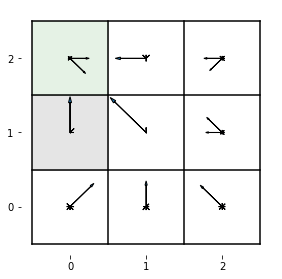

In [6]:
visualizePolicy(gridWidth, gridHeight, toyGoalA, toyTraps, toyPolicyA)

In [7]:
toyGoalB = (2,0)
getToyRewardB = SetupRewardTable(toyTransition, allActions, toyGoalB, toyTraps)
toyRewardB = getToyRewardB()

toyValueB = {state:0 for state in toyRewardB.keys()}

getToyPolicyB = BoltzmannValueIteration(toyTransition, toyRewardB, toyValueB, convergenceThreshold, gamma, beta)
optimalToyValuesB, toyPolicyB = getToyPolicyB()

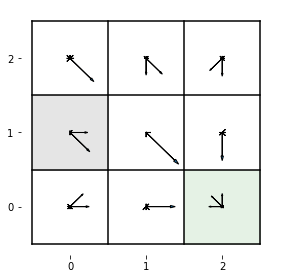

In [8]:
visualizePolicy(gridWidth, gridHeight, toyGoalB, toyTraps, toyPolicyB)

In [9]:
toyPolicies = [toyPolicyA, toyPolicyB]
toyPriors = [.5, .5]
toyTrajectory = [(0,0),(1,1),(0,2)]

In [ ]:
toyPolicies

In [14]:
class PerformGoalInference(object):
    def __init__(self, transitionTable, goalPolicies, goalPriors, stateTrajectory):
        self.transitionTable = transitionTable
        self.goalPolicies  = goalPolicies
        self.goalPriors = goalPriors
        self.stateTrajectory = stateTrajectory

    def __call__(self):
        posterior = self.getSequenceOfStateProbabilities()*np.array(self.goalPriors)        
        row_sums = posterior.sum(axis=1, keepdims=True)
        normalizedPosterior = posterior / row_sums
        return(normalizedPosterior)
        
    def getNextStateProbability(self, state, nextState, policy):
        possibleActionsToNextState = [action for action in self.transitionTable[state] \
                                      if nextState in self.transitionTable[state][action]]

        probNextState = sum([self.transitionTable[state][action][nextState]*policy[state][action] \
                             for action in possibleActionsToNextState])
        return(probNextState)
    
    def getSequenceOfStateProbabilities(self):
        probNextState = [self.goalPriors]
        for t, state in enumerate(self.stateTrajectory[:-1]):
            nextState = self.stateTrajectory[t+1]
            probNextState.append([self.getNextStateProbability(state, nextState, goalPolicy) \
                         for goalPolicy in self.goalPolicies])
        observedStateProbs = np.cumprod(np.array(probNextState), axis=0)
        return(observedStateProbs)


In [15]:
doGoalInference = PerformGoalInference(toyTransition, toyPolicies, toyPriors, toyTrajectory)
toyPosteriors = doGoalInference()

In [16]:
toyPosteriors

array([[0.5       , 0.5       ],
       [0.64353681, 0.35646319],
       [0.99439009, 0.00560991]])

In [ ]:
#Old Attempts

In [ ]:
class performGoalInference(object):
    def __init__(self, transitionTable, goalPolicies, goalPriors, stateTrajectory):
        self.transitionTable = transitionTable
        self.goalPolicies  = goalPolicies
        self.goalPriors = goalPriors
        self.stateTrajectory = stateTrajectory

    def __call__(self):
        goalPosteriors = {goal: self.getPosteriorAtEachT(goal) for goal in self.goalPriors.keys()}
        return(goalPosteriors)
    
    def getPosteriorAtEachT(self, goal):
        for t, state in enumerate(self.stateTrajectory[:-1]):
            print("getPosteriorAtEachT, T: ", t, " State: ", state)
            transitionProb = self.getNextStateProbability(state, self.stateTrajectory[t+1], goal)
            if t == 0:
                posterior = {goal: self.performBayesianUpdate(self.goalPriors[goal], transitionProb)}
            else:
                posterior[goal].append(self.performBayesianUpdate(posterior[goal][t-1], transitionProb))
            return(posterior)
    
    #Eq 4
    def getNextStateProbability(self, state, nextState, goal):
        possibleActionsToNextState = [action for action in self.transitionTable[state] \
                                      if nextState in self.transitionTable[state][action]]
        
        probNextState = sum([self.transitionTable[state][action][nextState]*self.goalPolicies[goal][state][action] \
                             for action in possibleActionsToNextState])
        return(probNextState)
    
    def performBayesianUpdate(self, prior, likelihood):
        posterior = {goal: prior[goal]*likelihood[goal] for goal in prior.keys()}
        
        normalizer = sum(posterior.values())
        normalizedPosterior = {goal: prob/normalizer for goal, prob in posterior.items()}
        return(normalizedPosterior)
    


In [ ]:
class performGoalInference(object):
    def __init__(self, transitionTable, goalPolicies, goalPriors, stateTrajectory):
        self.transitionTable = transitionTable
        self.goalPolicies  = goalPolicies
        self.goalPriors = goalPriors
        self.stateTrajectory = stateTrajectory 
        self.posterior = np.full((len(self.goalPriors.keys()), len(stateTrajectory)), 1/len(self.goalPriors.keys()))

    def __call__(self):
        unNormalizedPosterior = {time: self.getTimeTPosterior(time) \
                     if time != max(self.stateTrajectory.keys()) \
                     for time in self.stateTrajectory.keys()}
        
        normalizerAtT = {time: sum(posterior[time].values()) for time in posterior.values()}
        
        self.posterior = {time:{goal: unNormalizedPosterior[time][goal]/normalizerAtT[time] \
                                     for goal in unNormalizedPosterior[time].keys()}\
                               for time in unNormalizedPosterior.keys()}
        return(self.posterior)
    
    def getTimeTPosterior(self, time):
        posteriorAtT = {goal: self.getGoalPosteriorAtT(t, goal) for goal in self.goalPolicies.keys()}
        return(posteriorAtT)
    
    def getGoalPosteriorAtT(self, t, goal):
        likelihood = self.getNextStateProbability(self.stateTrajectory[t], self.stateTrajectory[t+1], goal)
        if t == 0:
            prior = self.goalPriors[goal]
        else:
            prior = self.posterior
    
    
    

In [ ]:
posterior = {}
for goal in self.prior.keys():
    for t, state in enumerate(self.stateTrajectory[:-1]):
        transitionProb = self.getNextStateProbability(state, self.stateTrajectory[t+1], goal)
        if t == 0:
            posterior[goal] = performBayesianUpdate(self.goalPriors[goal], transitionProb)
        else:
            posterior[goal].append(performBayesianUpdate(posterior[goal][t-1], transitionProb))

In [ ]:
    def getSequentialBayesianPosteriors(self):
        transitionProbabilities = {goal : [getNextStateProbability(currentState, nextState, goal) \
         for currentState, nextState in zip(self.stateTrajectory[:-1], self.stateTrajectory[1:])] \
                                   for goal in self.goalPolicies.keys()}

        posterior = {goal : performBayesianUpdate(self.goalPriors[goal], transitionProbabilities[goal][0])\
                     for goal in self.goalPriors.keys()}

        for goal in posterior.keys():
            for t, probability in enumerate(transitionProbabilities[goal][1:]):
                posterior[goal].append(self.performBayesianUpdate(posterior[goal][t-1], transitionProbabilities[goal][t])
        return(posterior)


In [ ]:
#Equation 4
def getNextStateProbability(currentState, nextState, transitionTable, goalPolicyTable):
    probNextState = sum([transitionTable[currentState][action][nextState]*goalPolicyTable[currentState][action] \
                         for action in transitionTable[currentState].keys()])
    return(probNextState)